# Imports necessários

In [3]:
!pip install -U ray

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 59.4 MB 1.2 MB/s 
     |████████████████████████████████| 4.1 MB 42.9 MB/s 
     |████████████████████████████████| 8.8 MB 47.6 MB/s 
     |████████████████████████████████| 468 kB 45.8 MB/s 
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.49.1
    Uninstalling grpcio-1.49.1:
      Successfully uninstalled grpcio-1.49.1


In [2]:
import gym
import numpy as np
from tqdm import tqdm
from nstep_sarsa_off_policy import run_nstep_sarsa_offPolicy, run_nstep_sarsa_offPolicy_control_variate, run_nstep_sarsa_offPolicy_steps, run_nstep_sarsa_offPolicy_control_variate_steps
from nstep_sarsa import run_nstep_sarsa, run_nstep_sarsa_step
from wrappers import DiscreteObservationWrapper
from plot_graph import moving_mean_plot, save_results, load_results, moving_mean_plot_many
import ray

In [5]:
ray.init(num_cpus=2)

2022-10-07 00:11:09,405	INFO worker.py:1518 -- Started a local Ray instance.


Python version:,3.7.14
Ray version:,2.0.0


In [6]:
@ray.remote
def wraper(env, STEPS, NSTEPS, LR, GAMMA, EPSILON):
  return run_nstep_sarsa_step(env, STEPS, NSTEPS, LR, GAMMA, EPSILON)
  
@ray.remote
def wraper_off_policy(env, STEPS, NSTEPS, LR, GAMMA, EPSILON):
  return run_nstep_sarsa_offPolicy_steps(env, STEPS, NSTEPS, LR, GAMMA, EPSILON)

@ray.remote
def wraper_off_policy_cv(env, STEPS, NSTEPS, LR, GAMMA, EPSILON):
  return run_nstep_sarsa_offPolicy_control_variate_steps(env, STEPS, NSTEPS, LR, GAMMA, EPSILON)

In [ ]:
# Melhores parâmetros para o sarsa off-policy

ENV_NAME = "Taxi-v3"
LR = 0.38991403904520333
GAMMA =  0.7179110617628607
EPSILON = 1
NSTEPS = 53
STEPS = 200_000

env = gym.make(ENV_NAME)

/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


In [7]:
# Melhores parâmetros para o sarsa off-policy control variate

ENV_NAME = "Taxi-v3"
LR = 0.628181544284742
GAMMA =  0.8883569718161417
EPSILON = 1
NSTEPS = 19
STEPS = 200_000

env = gym.make(ENV_NAME)

/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


In [ ]:
results_promises = [wraper.remote(env, STEPS, NSTEPS, LR, GAMMA, EPSILON) for i in tqdm(list(range(20)))]

100%|██████████| 20/20 [00:00<00:00, 292.53it/s]


In [ ]:
results_promises = [wraper_off_policy.remote(env, STEPS, NSTEPS, LR, GAMMA, EPSILON) for i in tqdm(list(range(20)))]

100%|██████████| 20/20 [00:00<00:00, 122.58it/s]


In [8]:
results_promises = [wraper_off_policy_cv.remote(env, STEPS, NSTEPS, LR, GAMMA, EPSILON) for i in tqdm(list(range(20)))]

100%|██████████| 20/20 [00:00<00:00, 62.56it/s]


In [9]:
results = ray.get(results_promises)

In [10]:
results = np.array(results)
save_results("taxi-2.npy", results)

# Resultados

In [11]:
# off-policy X on-policy
# taxi_offpolicy = load_results("taxi-1.npy")
taxi_onpolicy = load_results("taxi-0-1.npy")
taxi_offpolicy_cv = load_results("taxi-2.npy")
taxi_onpolicy_cv = load_results("taxi-0-2.npy")

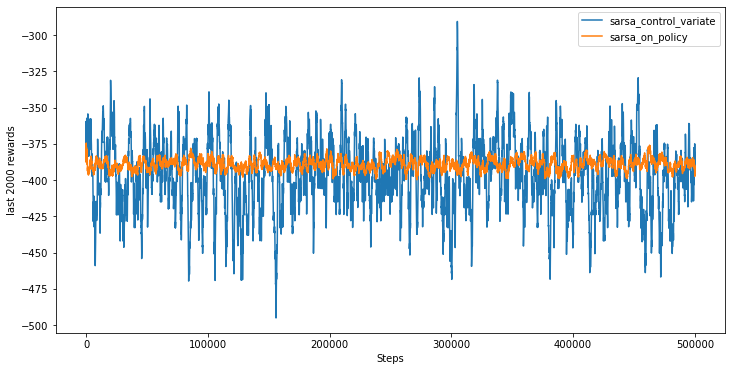

In [12]:
moving_mean_plot_many([taxi_offpolicy_cv.mean(axis=0), taxi_onpolicy_cv.mean(axis=0)], ['sarsa_control_variate', 'sarsa_on_policy'], 500_000, 2000)